In [ ]:
!nvidia-smi

Mon Aug  1 11:30:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

SKT KoBERT 설치
https://github.com/SKTBrain/KoBERT

In [ ]:
!pip install -q git+https://git@github.com/SKTBrain/KoBERT.git@master

     |████████████████████████████████| 132 kB 6.8 MB/s 
     |████████████████████████████████| 344 kB 48.8 MB/s 
     |████████████████████████████████| 49.1 MB 157 kB/s 
     |████████████████████████████████| 4.5 MB 51.9 MB/s 
     |████████████████████████████████| 1.2 MB 60.5 MB/s 
     |████████████████████████████████| 4.7 MB 46.4 MB/s 
     |████████████████████████████████| 596 kB 60.3 MB/s 
     |████████████████████████████████| 101 kB 12.1 MB/s 
     |████████████████████████████████| 6.6 MB 42.3 MB/s 
     |████████████████████████████████| 9.0 MB 49.4 MB/s 
     |████████████████████████████████| 79 kB 8.5 MB/s 
     |████████████████████████████████| 127 kB 71.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


KoSentenceBERT 설치
원본: https://github.com/BM-K/KoSentenceBERT_SKTBERT
빵형 수정본: https://github.com/kairess/KoSentenceBERT-SKT

In [ ]:
!git clone https://github.com/kairess/KoSentenceBERT-SKT

Cloning into 'KoSentenceBERT-SKT'...
remote: Enumerating objects: 572, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 572 (delta 37), reused 27 (delta 27), pack-reused 530
Receiving objects: 100% (572/572), 48.13 MiB | 17.02 MiB/s, done.
Resolving deltas: 100% (135/135), done.
Checking out files: 100% (453/453), done.


In [ ]:
!pip install -q -r KoSentenceBERT-SKT/requirements.txt

     |████████████████████████████████| 85 kB 3.5 MB/s 
     |████████████████████████████████| 563 kB 43.9 MB/s 
     |████████████████████████████████| 5.6 MB 11.4 MB/s 
     |████████████████████████████████| 880 kB 51.9 MB/s 
     |████████████████████████████████| 84 kB 1.8 MB/s 
     |████████████████████████████████| 79 kB 3.7 MB/s 
     |████████████████████████████████| 78 kB 984 kB/s 
     |████████████████████████████████| 85 kB 3.7 MB/s 
     |████████████████████████████████| 80 kB 6.9 MB/s 
     |████████████████████████████████| 81 kB 5.2 MB/s 
     |████████████████████████████████| 81 kB 4.7 MB/s 
     |████████████████████████████████| 78 kB 7.0 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
     |████████████████████████████████| 74 kB 3.0 MB/s 
     |████████████████████████████████| 74 kB 3.2 MB/s 
     |████████████████████████████████| 74 kB 3.1 MB/s 
     |████████████████████████████████| 64

In [ ]:
!pip uninstall -y sentence_transformers tokenizers transformers

Found existing installation: sentence-transformers 0.2.6.1
Uninstalling sentence-transformers-0.2.6.1:
  Successfully uninstalled sentence-transformers-0.2.6.1
Found existing installation: tokenizers 0.5.2
Uninstalling tokenizers-0.5.2:
  Successfully uninstalled tokenizers-0.5.2
Found existing installation: transformers 2.8.0
Uninstalling transformers-2.8.0:
  Successfully uninstalled transformers-2.8.0


Pretrained model 다운로드
https://drive.google.com/drive/folders/1fLYRi7W6J3rxt-KdGALBXMUS2W4Re7II

In [ ]:
!pip install -q -U gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
cd KoSentenceBERT-SKT

/content/KoSentenceBERT-SKT


In [ ]:
!mkdir output/training_sts/0_Transformer

In [ ]:
!gdown 1jcNHmpMNcp4IBD8ySnXp2Qna9UChbYY3 -O output/training_sts/0_Transformer/result.pt

Downloading...
From: https://drive.google.com/uc?id=1jcNHmpMNcp4IBD8ySnXp2Qna9UChbYY3
To: /content/KoSentenceBERT-SKT/output/training_sts/0_Transformer/result.pt
100% 369M/369M [00:03<00:00, 110MB/s]


In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

model_path = './output/training_sts'

embedder = SentenceTransformer(model_path)

# Corpus with example sentences
corpus = ['한 남자가 음식을 먹는다.',
          '한 남자가 빵 한 조각을 먹는다.',
          '그 여자가 아이를 돌본다.',
          '한 남자가 말을 탄다.',
          '한 여자가 바이올린을 연주한다.',
          '두 남자가 수레를 숲 속으로 밀었다.',
          '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.',
          '원숭이 한 마리가 드럼을 연주한다.',
          '치타 한 마리가 먹이 뒤에서 달리고 있다.',
          '한 남자가 파스타를 먹는다.',
          '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.',
          '치타가 들판을 가로 질러 먹이를 쫓는다.']

corpus_embeddings = embedder.encode(corpus)

# Then, we perform k-means clustering using sklearn:
from sklearn.cluster import KMeans

num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

/content/KoSentenceBERT-SKT/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/KoSentenceBERT-SKT/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]
using cached model. /content/KoSentenceBERT-SKT/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece
Load Model
Cluster  1
['한 남자가 말을 탄다.', '두 남자가 수레를 숲 속으로 밀었다.', '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.']

Cluster  2
['한 남자가 음식을 먹는다.', '한 남자가 빵 한 조각을 먹는다.', '한 남자가 파스타를 먹는다.']

Cluster  3
['치타 한 마리가 먹이 뒤에서 달리고 있다.', '치타가 들판을 가로 질러 먹이를 쫓는다.']

Cluster  4
['그 여자가 아이를 돌본다.', '원숭이 한 마리가 드럼을 연주한다.', '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.']

Cluster  5
['한 여자가 바이올린을 연주한다.']



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/test_all7.xlsx')

df.head()

,comment
0,딱딱한 무몀무 기여버
1,우리은빈이 너무귀여워 어트게 저렇게 귀엽지
2,귀염귀염
3,ㅋㅋㅋㅋㅋ
4,귀여웤ㅋㅋㅋㅋㅋ


In [ ]:
comments=df.comment

In [ ]:
df['comment'] = df['comment'] \
  .replace(r'[^가-힣 ]', ' ', regex=True) \
  .replace("'", '') \
  .replace(r'\s+', ' ', regex=True) \
  .str.strip() \
  .str[:255]

df.head()

,comment
0,딱딱한 무몀무 기여버
1,우리은빈이 너무귀여워 어트게 저렇게 귀엽지
2,귀염귀염
3,
4,귀여웤


In [ ]:
df = df[df['comment'].str.strip().astype(bool)]

len(df)

113510

In [ ]:
df['comment'].values.tolist()[:5]

['딱딱한 무몀무 기여버', '우리은빈이 너무귀여워 어트게 저렇게 귀엽지', '귀염귀염', '귀여웤', '빠르고 정확한 대사전달력']

In [ ]:
corpus = df['comment'].values.tolist()

corpus_embeddings = embedder.encode(corpus)

corpus_embeddings[:5]

array([[-0.52025574, -0.03175488,  0.26019925, ...,  0.06287802,
        -0.06453573,  0.13032457],
       [-0.12254202,  0.20856272,  0.24234492, ...,  0.06951553,
         0.32163808, -0.38364843],
       [-0.00134074, -0.03182645,  0.54989237, ..., -0.00632997,
        -0.26574025, -0.29428956],
       [ 0.23867002,  0.1848199 ,  0.7743012 , ...,  0.25601417,
        -0.00699445, -0.38692015],
       [-0.1150615 , -0.00381548, -0.01418198, ..., -0.06193269,
         0.0504877 , -0.02769258]], dtype=float32)

In [ ]:
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print('Cluster %d (%d)' % (i+1, len(cluster)))
    print(cluster)
    print('')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
!pip install -q konlpy tqdm

     |████████████████████████████████| 19.4 MB 6.6 MB/s 
     |████████████████████████████████| 453 kB 74.1 MB/s 


In [ ]:
from konlpy.tag import Komoran, Okt, Kkma, Hannanum
from tqdm import tqdm

extractor = Hannanum()

nouns = []

for review in tqdm(df['comment'].values.tolist()):
    nouns.extend(extractor.nouns(review))

len(nouns)

100%|██████████| 113510/113510 [06:34<00:00, 288.08it/s]


698260

In [ ]:
from collections import Counter

count = Counter(nouns)
words = dict(count.most_common())

for i, (word, count) in enumerate(words.items()):
    if i > 10:
        break

    print(word, count)

것 13542
우영우 10741
드라마 10460
진짜 8757
영우 6944
연기 6734
수 5325
나 5193
사람 5103
말 4471
생각 4465


In [ ]:
!wget https://github.com/kairess/MBTI-wordcloud/raw/master/NanumSquareRoundR.ttf

--2022-08-01 12:32:02--  https://github.com/kairess/MBTI-wordcloud/raw/master/NanumSquareRoundR.ttf
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kairess/MBTI-wordcloud/master/NanumSquareRoundR.ttf [following]
--2022-08-01 12:32:03--  https://raw.githubusercontent.com/kairess/MBTI-wordcloud/master/NanumSquareRoundR.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1063276 (1.0M) [application/octet-stream]
Saving to: ‘NanumSquareRoundR.ttf’

NanumSquareRoundR.t 100%[===================>]   1.01M  --.-KB/s    in 0.03s   

2022-08-01 12:32:03 (38.0 MB/s) - ‘NanumSquareRoundR.ttf’ saved [106

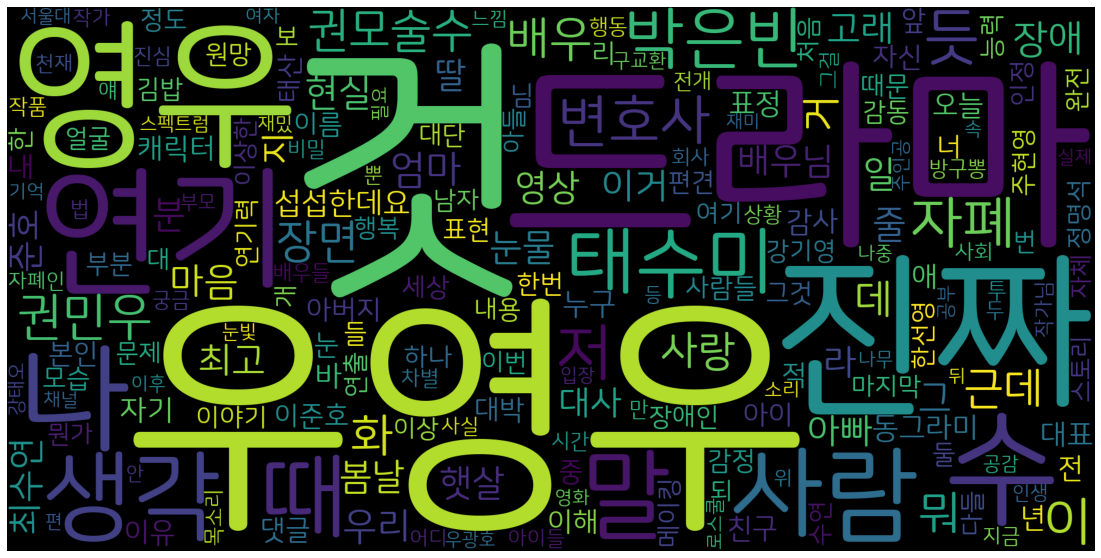

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    font_path='NanumSquareRoundR.ttf',
    width=2000,
    height=1000
).generate_from_frequencies(words)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
df1 = df
df1.head

<bound method NDFrame.head of                                                   comment
0                                             딱딱한 무몀무 기여버
1                                 우리은빈이 너무귀여워 어트게 저렇게 귀엽지
2                                                    귀염귀염
4                                                     귀여웤
5                                           빠르고 정확한 대사전달력
...                                                   ...
120990                                 싱주히 그라미는 가게사장님이 있죠
120992                                      안돼 수연이는 명석이 꺼
120993                                              혐관 맛집
120994                         가을 아 가을님 진지하게 뿜어서 아직도 콧물나용
120995  털보도 별로야 그냥 새로운 인물 나오길 권모술수는 인성에서 아웃이고 털보는 최수연이...

[113510 rows x 1 columns]>

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ


ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
okt = Okt()

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [ ]:
%%time
# 테스트 데이터 전처리
X_test = []
for sentence in tqdm(df1['comment']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████| 113510/113510 [08:27<00:00, 223.58it/s]

CPU times: user 12min 1s, sys: 5.63 s, total: 12min 6s
Wall time: 8min 27s


In [ ]:
# 단어 집합을 생성하면서 동시에 각 단어에 고유한 정수를 부여합니다.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)

In [ ]:
print(tokenizer.word_index)

{'보다': 1, '을': 2, '우': 3, '있다': 4, '우영': 5, '드라마': 6, '아니다': 7, '너무': 8, '같다': 9, '좋다': 10, '진짜': 11, '되다': 12, '이다': 13, '에서': 14, '연기': 15, '로': 16, '다': 17, '사람': 18, '없다': 19, '영': 20, '님': 21, '말': 22, '그': 23, '배우': 24, '않다': 25, '것': 26, '요': 27, '안': 28, '나오다': 29, '생각': 30, '저': 31, '자폐': 32, '박은빈': 33, '적': 34, '때': 35, '인': 36, '그렇다': 37, '거': 38, '고': 39, '가다': 40, '만': 41, '아': 42, '못': 43, '나': 44, '변호사': 45, '게': 46, '오다': 47, '더': 48, '알다': 49, '하고': 50, '자다': 51, '왜': 52, '귀엽다': 53, '보고': 54, '태': 55, '네': 56, '수미': 57, '들다': 58, '내': 59, '까지': 60, '수': 61, '모르다': 62, '맞다': 63, '화': 64, '정말': 65, '영우': 66, '인데': 67, '장면': 68, '분': 69, '넘다': 70, '울다': 71, '받다': 72, '권': 73, '그냥': 74, '많다': 75, '민우': 76, '권모술수': 77, '뭐': 78, '고래': 79, '이렇다': 80, '중': 81, '싶다': 82, '일': 83, '현실': 84, '라고': 85, '임': 86, '엄마': 87, '하': 88, '버리다': 89, '지': 90, '해주다': 91, '재밌다': 92, '에게': 93, '면': 94, '미치다': 95, '근데': 96, '어떻다': 97, '서': 98, '아빠': 99, '우리': 100, '준호': 101, '랑': 102, '대표': 103

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 33442
등장 빈도가 2번 이하인 희귀 단어의 수: 18163
단어 집합에서 희귀 단어의 비율: 54.31194306560613
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.6139862120056092
